# 회귀, 분류 모델링

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier, plot_tree

titanic_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/ML/titanic/train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. 의사결정나무 (Decision Tree, DT)

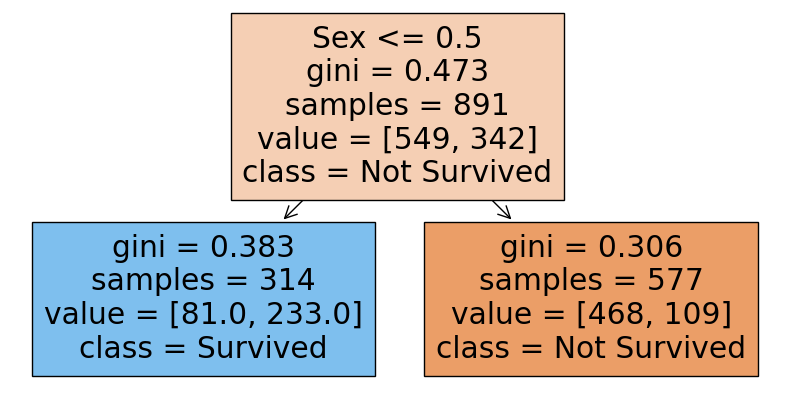

In [16]:
# Pclass, Sex: LabelEncoder
# Age: 결측치 있으므로 평균으로 대치

X_features = ['Pclass', 'Sex', 'Age']

le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

le2 = LabelEncoder()
titanic_df['Pclass'] = le.fit_transform(titanic_df['Pclass'])

age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(age_mean)

x = titanic_df[X_features]
y = titanic_df['Survived']

# 일관된 평가를 위한 random_state 고정: random_state = 42
model_dt = DecisionTreeClassifier(max_depth = 1)
model_dt.fit(x, y)

plt.figure(figsize = (10, 5))

plot_tree(model_dt, feature_names = X_features, class_names = ['Not Survived', 'Survived'], filled = True)
plt.show()

## 2. 랜덤 포레스트 (Random Forest, RF)

로지스틱회귀, 의사결정나무, 랜덤포레스트 비교하기

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model_lor = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

model_lor.fit(x, y)
model_dt.fit(x, y)
model_rf.fit(x, y)

y_lor_pred = model_lor.predict(x)
y_dt_pred = model_dt.predict(x)
y_rf_pred = model_rf.predict(x)

def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(model_name, ')', 'acc 스코어: ', acc, ',', 'f1 스코어: ', f1)


get_score('lor', y, y_lor_pred)
get_score('dt', y, y_dt_pred)
get_score('rf', y, y_rf_pred)

lor ) acc 스코어:  0.8002244668911336 , f1 스코어:  0.7319277108433735
dt ) acc 스코어:  0.8799102132435466 , f1 스코어:  0.8325508607198748
rf ) acc 스코어:  0.8799102132435466 , f1 스코어:  0.8356374807987711


In [28]:
X_features

['Pclass', 'Sex', 'Age']

In [27]:
# 각 변수의 중요도 확인
model_rf.feature_importances_

array([0.17523883, 0.40121043, 0.42355074])

## 3. 최근접 이웃, 부스팅 알고리즘 + 실습 비교

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model_knn = KNeighborsClassifier()
model_gbm = GradientBoostingClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)
model_lgb = LGBMClassifier(random_state=42)

model_knn.fit(x, y)
model_gbm.fit(x, y)
model_xgb.fit(x, y)
model_lgb.fit(x, y)

y_knn_pred = model_knn.predict(x)
y_gbm_pred = model_gbm.predict(x)
y_xgb_pred = model_xgb.predict(x)
y_lgb_pred = model_lgb.predict(x)

get_score('lor', y, y_lor_pred)
get_score('dt', y, y_dt_pred)
get_score('rf', y, y_rf_pred)
get_score('knn', y, y_knn_pred)
get_score('gbm', y, y_gbm_pred)
get_score('xgb', y, y_xgb_pred)
get_score('lgb', y, y_lgb_pred)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g